In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import TSNE

### (1) Distance between PDFs
#### (a) Cross Entropy (CE)
#### (i)

In [2]:
def hw1q4aNormHist(image):
    try:
        img = mpimg.imread(image)
        #img = Image.open(image)
    except FileNotFoundError:
        print("No image {} was found! Input file has to be in the same directory as this code is!".format(image))
        return False
    width = img.shape[0]
    height = img.shape[1]
    for i in range(width):
        for j in range(height):
            img[i][j] = int(img[i][j]*256)
    hist_size = 256
    hist = np.zeros(hist_size, float)
    for i in range(width):
        for j in range(height):
            hist[int(img[i][j])] += 1
    tot_px = width * height
    norm_hist = np.array([value/tot_px for value in hist])
    return norm_hist

def hw1q3aEntropy(pmf):
    pmf = pmf[pmf > 0]
    h = -np.sum(pmf * np.log2(pmf))
    if(h == -0.0):
        return np.abs(h)
    else:
        return h

def hw1q7aRelativeEntropy(pmf1, pmf2):
    h = 0
    for i in range(pmf1.shape[0]):
        if pmf1[i] == 0.0 or pmf2[i] == 0.0:
            continue
        temp = pmf1[i] * np.log2(pmf1[i]/pmf2[i])
        #print(temp)
        h += temp
    return h

def q1aCrossEntropy(pmf1, pmf2):
    div = hw1q7aRelativeEntropy(pmf1, pmf2)
    ent = hw1q3aEntropy(pmf1)
    cross_ent = ent + div
    return cross_ent

In [3]:
image1 = "left.png"
image2 = "right.png"
pmf1 = hw1q4aNormHist(image1)
pmf2 = hw1q4aNormHist(image2)
cross_entropy1 = q1aCrossEntropy(pmf1, pmf2)
cross_entropy2 = q1aCrossEntropy(pmf2, pmf1)
print("Cross entropy from {} to {}: {}".format(image1, image2, cross_entropy1))
print("Cross entropy from {} to {}: {}".format(image2, image1, cross_entropy2))

Cross entropy from left.png to right.png: 7.273398119987326
Cross entropy from right.png to left.png: 7.29303531752948


#### (ii)

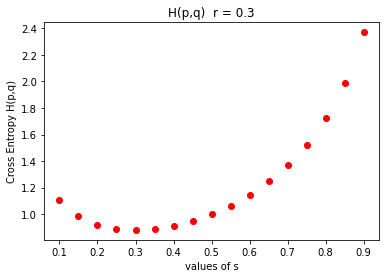

Yes, Minimum value of H(p,q) is obtained when both PMFs have same value


In [4]:
r = 0.3
s = [0.1,0.15, 0.2, 0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9]
for i in s:
    cross_entropy = q1aCrossEntropy(np.array([r, 1-r]), np.array([i, 1-i]))
    plt.plot(i, cross_entropy, 'ro')
    #print(cross_entropy)
plt.xlabel("values of s")
plt.ylabel("Cross Entropy H(p,q)")
plt.title("H(p,q)  r = {}".format(r))
"""
for i in s:
    divergence2 = q7aRelativeEntropy(np.array([i, 1-i]), np.array([r, 1-r]))
    plt.plot(i, divergence2, 'bo')
    #print(divergence2)
plt.xlabel("values of s")
plt.ylabel("Kl Divergence")
plt.title("D(q||p)  r = {}".format(r))
"""
plt.show()
print("Yes, Minimum value of H(p,q) is obtained when both PMFs have same value")

#### (b) Jensen Shannon (JS) Divergence

In [5]:
def q2bJSDivergence(pmf1, pmf2):
    m = np.zeros(pmf1.shape[0], float)
    sum = 0
    for i in range(pmf1.shape[0]):
            m[i] = (pmf1[i] + pmf2[i])/2
            sum = sum + m[i]
    divergence1 = hw1q7aRelativeEntropy(pmf1, m)
    divergence2 = hw1q7aRelativeEntropy(pmf2, m)
    js_divergence = divergence1+ divergence2
    return js_divergence

In [6]:
print(q2bJSDivergence(pmf1, pmf2))

0.0073460795386296514


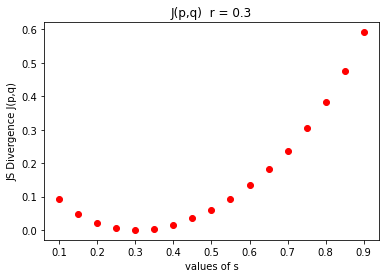

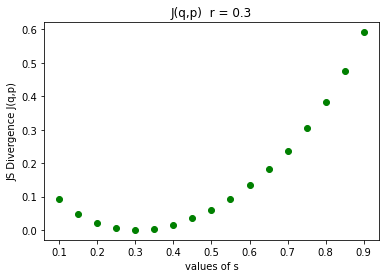

As you can see J(p,q) and J(q,p) are very similar making Jensen Divergence symmetric rather KL divergence


In [7]:
r = 0.3
s = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
for i in s:
    js_div = q2bJSDivergence(np.array([r, 1-r]), np.array([i, 1-i]))
    plt.plot(i, js_div, 'ro')
    #print(cross_entropy)
plt.xlabel("values of s")
plt.ylabel("JS Divergence J(p,q)")
plt.title("J(p,q)  r = {}".format(r))
plt.show()
for i in s:
    js_div = q2bJSDivergence(np.array([i, 1-i]), np.array([r, 1-r]))
    plt.plot(i, js_div, 'go')
    #print(cross_entropy)
plt.xlabel("values of s")
plt.ylabel("JS Divergence J(q,p)")
plt.title("J(q,p)  r = {}".format(r))
plt.show()
print("As you can see J(p,q) and J(q,p) are very similar making Jensen Divergence symmetric rather KL divergence")

#### (c) Wasserstein Distance

In [8]:
def hw2q1cWassersteinDist(joint_pdf, pdf1, pdf2):
    row_size = joint_pdf.shape[0]
    col_size = joint_pdf.shape[1]
    flag = True
    for i in range(row_size):
        sum = 0.0
        for j in range(col_size):
            sum = round(sum + joint_pdf[i][j], 12) #round function added to cover the 0.1 + 0.2 = 0.30000000000000004 issue
        if pdf1[i] != sum:
            flag = False
            print("No, given joint PDF is not part of all bivariate joint PDFs whose marginals are given")
            return flag
    for i in range(col_size):
        sum = 0.0
        for j in range(row_size):
            sum = round(sum + joint_pdf[j][i], 12) #round function added to cover the 0.1 + 0.2 = 0.30000000000000004 issue
        if pdf2[i] != sum:
            flag = False
            print("No, given joint PDF is not part of all bivariate joint PDFs whose marginals are given")
            return flag
    print("Yes, Given joint PDF is part of all bivariate joint PDFs whose marginals are given")
    return flag

In [9]:
pdf1 = np.array([0.2, 0.3, 0.5], float)
pdf2 = np.array([0.5, 0.5], float)
"""
positive example
joint_pdf1 = [  [0.1 0.1]
                [0.2 0.1]
                [0.2 0.3]  ]
"""

"""
negative example
joint_pdf1 = [  [0.15 0.05]
                [0.2 0.2]
                [0.2 0.2]  ]
"""
joint_pdf1 = np.array([[0.1, 0.1], [0.2, 0.1], [0.2, 0.3]]) ##positive example
flag1 = hw2q1cWassersteinDist(joint_pdf1, pdf1, pdf2)

joint_pdf2 = np.array([[0.15, 0.05], [0.2, 0.2], [0.2, 0.2]]) ##negative example
flag2 = hw2q1cWassersteinDist(joint_pdf2, pdf1, pdf2)

Yes, Given joint PDF is part of all bivariate joint PDFs whose marginals are given
No, given joint PDF is not part of all bivariate joint PDFs whose marginals are given


### (2) Visualizing Data Using t-SNE
#### (a) (i)
When we are unable to preserve the distances between datapoints while embedding a higher dimension space to lower dimension space, the problem that occurs is called Crowding problem. Taking an example of a square ABCD (A at origin) with distance between adjacent vertices being 1. While embedding the data points on one dimensional line, if we plot vertex A and to the right with distance 1, we plot vertex B and again to the right of B plotting vertex C with distance 1 and again to the right of C plotting D with distance 1. From the two dimensional square the distance between A and D was 1, but in one dimensional line, distance between A and D has increased to 3 and the distance is not preserved. So if we try to keep all the equal distance points from a referral point, we might get some points being overlapping each other which is not possible to be represented in lower dimensional space.
#### (ii)
Student t-distribution helps address the corwding problem by mapping to joint probabilities which are invariant to the change in scale of dimensions.
#### (iii)
1. It uses a symmetrized SNE cost function for calculation of gradients
2. It uses Student t-distribution rather than Gaussian to compute the similarity between two datapoints in the low-dimensional space.

#### (b)

In [10]:
X = np.concatenate((np.random.multivariate_normal([1,1,1,1,1,1,1,1,1,1], 0.01*np.identity(10), 10), np.random.multivariate_normal([10,10,10,10,10,10,10,10,10,10], 0.01*np.identity(10), 10)))
Y = np.random.multivariate_normal(np.zeros(2), 0.0001*np.identity(2), 20)

Divergence at first iteration = 2.7710556215535775
Divergence at last iteration = 1.1957409838795607


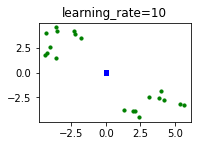

Divergence at first iteration = 2.7710556215535775
Divergence at last iteration = 1.2867955397550186


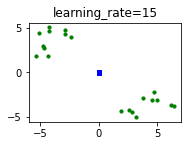

Divergence at first iteration = 2.7710556215535775
Divergence at last iteration = 1.4741129924019427


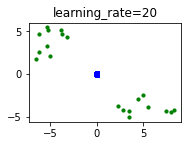

Divergence at first iteration = 2.7710556215535775
Divergence at last iteration = 1.8632589085746412


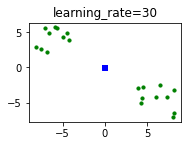

Divergence at first iteration = 2.7710556215535775
Divergence at last iteration = 1.9566620432388782


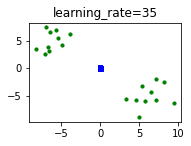

We can see that the value of divergence is reducing as we are moving from first iteration to last iteration. This reduction can be seen in all the learning rates
We can also see from the plots that when learning rate is increasing the clusters forming for the data points are more clear and compact


In [11]:
def p_cond(X, sigma):
    x_width = X.shape[0]
    x_height = X.shape[1]
    exp_matrix = np.zeros((x_width, x_width), float)
    for i in range(x_width):
        for j in range(x_width):
            if i == j:
                exp_matrix[i][j] = 0
            else:
                sum = 0
                for k in range(x_height):
                    sum = sum + np.square(X[i][k] - X[j][k])
                exp_matrix[i][j] = np.exp((-sum)/(2*np.square(sigma)))
    
    p = np.zeros((x_width, x_width), float)
    for i in range(x_width):
        for j in range(x_width):
            if i == j:
                p[i][j] = 0
            else:
                #print(X[i])
                p[i][j] = exp_matrix[i][j]/(np.sum(exp_matrix[i]))
    
    p_ij = np.zeros((x_width, x_width), float)
    for i in range(x_width):
        for j in range(x_width):
            p_ij[i][j] = (p[i][j] + p[j][i])/(2*x_width)
    return p_ij

def q_cond(Y):
    y_width = Y.shape[0]
    y_height = Y.shape[1]
    q_matrix = np.zeros((y_width, y_width), float)
    for i in range(y_width):
        for j in range(y_width):
            if i == j:
                q_matrix[i][j] = 1
            else:
                sum = 0
                for k in range(y_height):
                    sum = sum + np.square(Y[i][k] - Y[j][k])
                q_matrix[i][j] = 1/(1 + sum)
    
    q_ij = np.zeros((y_width, y_width), float)
    for i in range(y_width):
        for j in range(y_width):
            q_ij[i][j] = q_matrix[i][j]/np.sum(q_matrix)
    return q_matrix, q_ij

def grad(Y, P, Q, q_matrix):
    y_width = Y.shape[0]
    y_height = Y.shape[1]
    C = np.zeros((y_width, y_height), float)
    for i in range(y_width):
        sum = np.zeros(2, float)
        for j in range(y_width):
            PQ_diff = P[i][j] - Q[i][j]
            y_diff = Y[i] - Y[j]
            sum = sum + (PQ_diff)*(q_matrix[i][j])*(y_diff)
        C[i] = 4*sum
    return C

def hw2q2bRelativeEntropy2D(pmf1, pmf2):
    h = 0
    for i in range(pmf1.shape[0]):
        for j in range(pmf1.shape[1]):
            if pmf1[i][j] == 0.0 or pmf2[i][j] == 0.0:
                continue
            temp = pmf1[i][j] * np.log2(pmf1[i][j]/pmf2[i][j])
            #print(temp)
            h += temp
    return h

def hw2q2bTSNE(X, sigma, Y, n_iter, momentum, learning_rate):
    x_width = X.shape[0]
    x_height = X.shape[1]
    y_width = Y.shape[0]
    y_height = Y.shape[1]
    Y_2 = Y.copy()
    Y_1 = Y.copy()
    P = p_cond(X, sigma)
    fig = plt.figure()
    ax = fig.add_subplot(221)
    for i in range(n_iter):
        q_matrix, Q = q_cond(Y)
        C = grad(Y, P, Q, q_matrix)
        Y = Y - (learning_rate * C) + (momentum*(Y_1 - Y_2))
        Y_2 = Y_1.copy()
        Y_1 = Y.copy()
        if (i == 0 or i == (n_iter - 1)):
            if i == 0:
                marker = "s"
                color = "b"
                label = "first iteration"
            if i == (n_iter - 1):
                marker = "o"
                color = "g"
                label = "last iteration"
            divergence = hw2q2bRelativeEntropy2D(P, Q)
            #print(Y)
            print("Divergence at {} = {}".format(label, divergence))
            x_axis = Y[:, 0]
            y_axis = Y[:, 1]
            plt.title(f"learning_rate=%d"%learning_rate)
            ax.scatter(x_axis, y_axis, s=10, c=color, marker=marker, label=label)
    plt.show()
    return Y

sigma = 0.1
n_iter = 50
momentum = 0.7
for i in [10, 15, 20, 30, 35]:
    Y_output = hw2q2bTSNE(X, sigma, Y, n_iter, momentum, i)
print("We can see that the value of divergence is reducing as we are moving from first iteration to last iteration. This reduction can be seen in all the learning rates")
print("We can also see from the plots that when learning rate is increasing the clusters forming for the data points are more clear and compact")

#### (c)

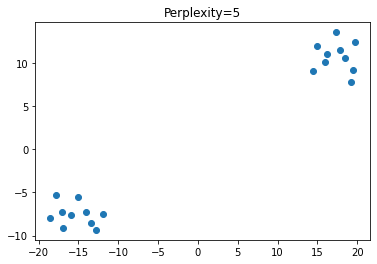

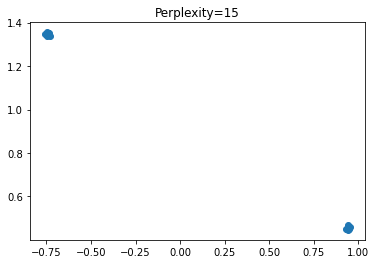

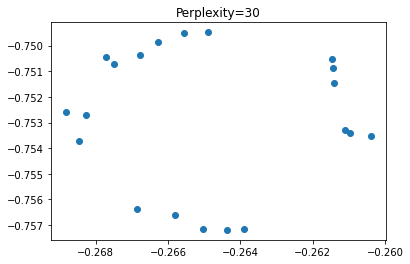

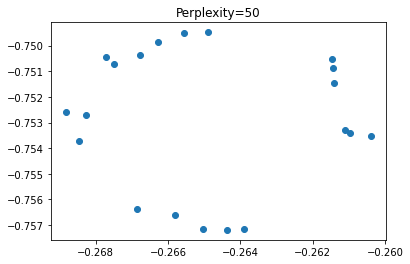

We can see that when we increase the perplexity, the clusters are breaking and forming a type of topological shapes


In [12]:
def hw2q2cinbuiltTSNE(X, Y, perp):
    tsne =  TSNE(n_components=2, perplexity=perp, learning_rate=10.0, init=Y)
    Y_output = tsne.fit_transform(X)
    return Y_output

for perp in [5, 15, 30, 50]:
    Y_output = hw2q2cinbuiltTSNE(X, Y, perp)
    x_axis = Y_output[:, 0]
    y_axis = Y_output[:, 1]
    plt.title(f"Perplexity=%d"%perp)
    plt.scatter(x_axis, y_axis)
    plt.show()
print("We can see that when we increase the perplexity, the clusters are breaking and forming a type of topological shapes")

### (3) Convolution and Correlation

In [13]:
def hw2q3Replication_padding(channel, width, height, kernel_width, kernel_height, input):
    for i in range(0, int((kernel_width - 1)/2)):
        for j in range(int((kernel_height - 1)/2), height + int((kernel_height - 1)/2)):
            for c in range(channel):
                input[i][j][c] = input[kernel_width - 2 - i][j][c]
                input[width + kernel_width - 2 - i][j] = input[width + i][j] 
    """
    for i in range(width + int((kernel_width - 1)/2), width + kernel_width - 1):
        for j in range(int((kernel_height - 1)/2), height + int((kernel_height - 1)/2)):
            for c in range(channel):
                input[i][j][c] = input[i - kernel_width + 2][j][c]
    """            
    for i in range(0, width + kernel_width - 1):
        for j in range(0, int((kernel_height - 1)/2)):
            for c in range(channel):
                input[i][j][c] = input[i][kernel_height - 2 - j][c]
                input[i][height + kernel_height - 2 - j] = input[i][height + j]
    """
    for i in range(0, width + kernel_width - 1):
        for j in range(height + int((kernel_height - 1)/2), height + kernel_height - 1):
            for c in range(channel):
                input[i][j][c] = input[i][j - kernel_height + 2][c]
    for i in range(0, int((kernel_width - 1)/2)):
        for j in range(0, int((kernel_height - 1)/2)):
            for c in range(channel):
                input[i][j][c] = input[kernel_width - 2 - i][kernel_height - 2 - j][c]
    for i in range(width + int((kernel_width - 1)/2), width + kernel_width - 1):
        for j in range(height + int((kernel_height - 1)/2), height + kernel_height - 1):
            for c in range(channel):
                input[i][j][c] = input[i - kernel_width + 2][j - kernel_height + 2][c]
    for i in range(width + int((kernel_width - 1)/2), width + kernel_width - 1):
        for j in range(0, int((kernel_height - 1)/2)):
            for c in range(channel):
                input[i][j][c] = input[i - kernel_width + 2][kernel_height - 2 - j][c]
    for i in range(0, int((kernel_width - 1)/2)):
        for j in range(height + int((kernel_height - 1)/2), height + kernel_height - 1):
            for c in range(channel):
                input[i][j][c] = input[kernel_width - 2 - i][j - kernel_height + 2][c]
    """
    return input

#### (a) Convolution

In [14]:
def hw2q3aConvolution(image, kernel):
    try:
        img = mpimg.imread(image)
        #img = Image.open(image)
    except FileNotFoundError:
        print("No image {} was found! Input file has to be in the same directory as this code is!".format(image))
        return False
    #print(img)
    #print(img[0:3, 0:5, 0:3])
    width = img.shape[0]
    height = img.shape[1]
    channel = img.shape[2]
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    input = np.zeros((width + kernel_width - 1, height + kernel_height - 1, channel), int)
    for i in range(width):
        for j in range(height):
            for c in range(channel):
                input[i + int((kernel_width - 1)/2)][j + int((kernel_height - 1)/2)][c] = img[i][j][c]
    input = hw2q3Replication_padding(channel, width, height, kernel_width, kernel_height, input)
    output = np.zeros((width + kernel_width - 1, height + kernel_height - 1), int)
    for i in range(int((kernel_width-1)/2), width + int((kernel_width-1)/2)):
        for j in range(int((kernel_height-1)/2), height + int((kernel_height-1)/2)):
            for c in range(channel):
                for k in range(-int((kernel_width-1)/2), int((kernel_width-1)/2) + 1):
                    for l in range(-int((kernel_height-1)/2), int((kernel_height-1)/2) + 1):
                        #if (i - k) >= 0 and (i - k) < width and (j - l) >= 0 and (j - l) < height:
                        output[i][j] += input[i - k][j - l][c] * kernel[int((kernel_width-1)/2) + k][int((kernel_height-1)/2)+ l][c]
    #print(output)
    output_temp = output[int((kernel_width - 1)/2):int(width + ((kernel_width - 1)/2)), int((kernel_height - 1)/2):int(height + ((kernel_height - 1)/2))].astype(float)
    output_temp = (255*(output_temp - np.min(output_temp))/np.ptp(output_temp)).astype(int)
    return output_temp

#### (b) Correlation

In [15]:
def hw2q3aCorrelation(image, kernel):
    try:
        img = mpimg.imread(image)
        #img = Image.open(image)
    except FileNotFoundError:
        print("No image {} was found! Input file has to be in the same directory as this code is!".format(image))
        return False
    #print(img)
    #print(img[100:111, 100:111, 0:3])
    width = img.shape[0]
    height = img.shape[1]
    channel = img.shape[2]
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    input = np.zeros((width + kernel_width - 1, height + kernel_height - 1, channel), int)
    for i in range(width):
        for j in range(height):
            for c in range(channel):
                input[i + int((kernel_width - 1)/2)][j + int((kernel_height - 1)/2)][c] = img[i][j][c]
    input = hw2q3Replication_padding(channel, width, height, kernel_width, kernel_height, input)
    output = np.zeros((width + kernel_width - 1, height + kernel_height - 1), int)
    for i in range(int((kernel_width-1)/2), width + int((kernel_width-1)/2)):
        for j in range(int((kernel_height-1)/2), height + int((kernel_height-1)/2)):
            for c in range(channel):
                for k in range(-int((kernel_width-1)/2), int((kernel_width-1)/2) + 1):
                    for l in range(-int((kernel_height-1)/2), int((kernel_height-1)/2) + 1):
                        #if (i - k) >= 0 and (i - k) < width and (j - l) >= 0 and (j - l) < height:
                        output[i][j] += input[i + k][j + l][c] * kernel[int((kernel_width-1)/2) + k][int((kernel_height-1)/2)+ l][c]
    #print(output)
    output_temp = output[int((kernel_width - 1)/2):int(width + ((kernel_width - 1)/2)), int((kernel_height - 1)/2):int(height + ((kernel_height - 1)/2))].astype(float)
    output_temp = (255*(output_temp - np.min(output_temp))/np.ptp(output_temp)).astype(int)
    return output_temp

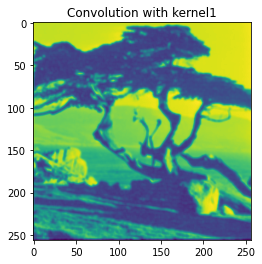

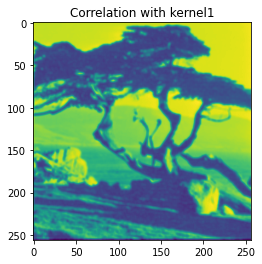

In [16]:
image3 = "4.1.06.tiff"

## kernel1 size is [3, 3, 3]
kernel1 = np.array([[[165, 204, 214], [132, 179, 193], [110, 159, 187]], [[166, 202, 217], [165, 200, 217], [163, 198, 215]], [[162, 199, 215], [161, 198, 216], [161, 199, 214]]])
#kernel1 = np.array([[[163, 199, 215], [162, 198, 214], [165, 199, 216], [165, 199, 215], [165, 199, 213], [161, 198, 213], [160, 198, 215], [166, 199, 214], [166, 199, 215], [166, 199, 213], [165, 199, 214]], [[158, 199, 214], [160, 198, 214], [160, 199, 213], [164, 200, 216], [164, 199, 214], [165, 198, 212], [165, 198, 213], [163, 198, 215], [162, 198, 215], [163, 199, 216], [161, 198, 211]], [[158, 197, 212], [161, 198, 215], [160, 198, 215], [163, 198, 214], [159, 198, 214], [162, 198, 213], [159, 198, 214], [164, 197, 213], [161, 195, 214], [162, 197, 213], [167, 200, 213]], [[158, 198, 212], [162, 198, 213], [163, 198, 214], [161, 198, 212], [162, 198, 212], [163, 197, 215], [159, 200, 214], [164, 198, 212], [161, 199, 213], [164, 199, 214], [165, 199, 214]], [[160, 198, 215], [159, 198, 215], [159, 197, 212], [161, 199, 214], [165, 200, 217], [162, 198, 212], [163, 199, 213], [163, 199, 215], [163, 199, 214], [159, 198, 215], [161, 200, 216]], [[158, 199, 213], [161, 197, 214], [160, 196, 210], [163, 198, 212], [163, 198, 214], [160, 197, 214], [163, 196, 211], [161, 197, 214], [167, 200, 215], [165, 200, 214], [167, 200, 215]], [[162, 200, 214], [163, 198, 212], [162, 199, 214], [157, 196, 214], [157, 198, 215], [159, 198, 214], [161, 199, 213], [165, 198, 213], [163, 200, 215], [166, 200, 215], [168, 201, 217]], [[163, 199, 213], [163, 198, 214], [166, 201, 215], [160, 199, 213], [158, 197, 215], [157, 198, 215], [158, 198, 213], [162, 198, 213], [164, 198, 216], [160, 200, 215], [168, 198, 216]], [[155, 196, 212], [158, 196, 213], [162, 198, 215], [160, 198, 213], [155, 196, 213], [158, 196, 212], [162, 197, 214], [161, 198, 214], [160, 199, 214], [158, 198, 215], [159, 199, 215]], [[154, 197, 214], [157, 196, 212], [157, 197, 212], [159, 199, 214], [154, 198, 214], [155, 199, 213], [157, 198, 214], [157, 199, 213], [158, 197, 213], [159, 199, 213], [162, 200, 216]], [[157, 197, 213], [160, 197, 212], [159, 199, 212], [158, 198, 213], [155, 198, 213], [155, 198, 215], [157, 197, 212], [159, 199, 214], [156, 198, 213], [157, 197, 212], [161, 199, 214]]])

output1 = hw2q3aConvolution(image3, kernel1)
#print("Convolution Ouput Central patch - first kernel: ", output1)
plt.title("Convolution with kernel1")
plt.imshow(output1)
plt.show()

output2 = hw2q3aCorrelation(image3, kernel1)
#print("Correlation Ouput Central patch - first kernel: ", output2)
plt.title("Correlation with kernel1")
plt.imshow(output2)
plt.show()

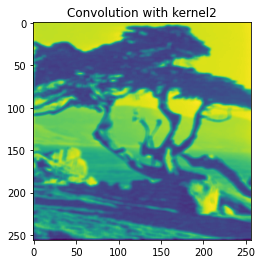

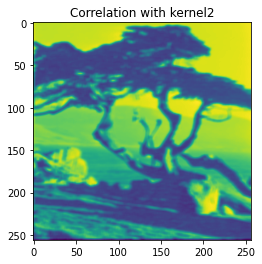

In [17]:
#kernel2 size is [3, 5, 3]
kernel2 = np.array([[[233,   0, 246],[202, 217, 221],[205, 218, 220],[204, 218, 221],[204, 218, 221]], [[230, 217, 237], [203, 217, 221], [206, 217, 220], [204, 217, 221], [200, 217, 220]], [[230, 217, 236], [200, 217, 221], [200, 216, 220], [201, 216, 221], [197, 217, 223]]])

output3 = hw2q3aConvolution(image3, kernel2)
#print("Convolution Ouput Central patch - second kernel: ", output3)
plt.title("Convolution with kernel2")
plt.imshow(output3)
plt.show()

output4 = hw2q3aCorrelation(image3, kernel2)
#print("Correlation Ouput Central patch - second kernel: ", output4)
plt.title("Correlation with kernel2")
plt.imshow(output4)
plt.show()